In [1]:
import pathlib as pl
import matplotlib.pyplot as plt
import xugrid as xu

In [2]:
ws = pl.Path("../../modflow6/.mf6minsim/")

In [3]:
xul = xu.open_dataset(ws / "leftmodel.nc")
xul

<xarray.Dataset> Size: 776B
Dimensions:          (time: 1, nmesh_node: 12, nmesh_face: 5,
                      max_nmesh_face_nodes: 4)
Coordinates:
  * time             (time) datetime64[ns] 8B 1994-11-06T13:15:30
  * nmesh_face       (nmesh_face) int64 40B 0 1 2 3 4
  * nmesh_node       (nmesh_node) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: max_nmesh_face_nodes
Data variables:
    mesh_node_x      (nmesh_node) float64 96B ...
    mesh_node_y      (nmesh_node) float64 96B ...
    mesh_face_x      (nmesh_face) float64 40B ...
    mesh_face_xbnds  (nmesh_face, max_nmesh_face_nodes) float64 160B ...
    mesh_face_y      (nmesh_face) float64 40B ...
    mesh_face_ybnds  (nmesh_face, max_nmesh_face_nodes) float64 160B ...
    head_l1          (time, nmesh_face) float64 40B ...
Attributes:
    title:           LEFTMODEL hydraulic head
    source:          MODFLOW 6 6.6.0.dev0 (preliminary) 05/23/2024
    modflow6_grid:   LAYERED MESH
    modflow6_model:  LEFTMODEL: MODFLOW 6 Groundwater Flow (GWF) model
    history:         first created 2024/8/8 12:13:49.848
    Conventions:     CF-1.11 UGRID-1.0

In [4]:
xur = xu.open_dataset(ws / "rightmodel.nc")
xur

<xarray.Dataset> Size: 776B
Dimensions:          (time: 1, nmesh_node: 12, nmesh_face: 5,
                      max_nmesh_face_nodes: 4)
Coordinates:
  * time             (time) datetime64[ns] 8B 1994-11-06T13:15:30
  * nmesh_face       (nmesh_face) int64 40B 0 1 2 3 4
  * nmesh_node       (nmesh_node) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: max_nmesh_face_nodes
Data variables:
    mesh_node_x      (nmesh_node) float64 96B ...
    mesh_node_y      (nmesh_node) float64 96B ...
    mesh_face_x      (nmesh_face) float64 40B ...
    mesh_face_xbnds  (nmesh_face, max_nmesh_face_nodes) float64 160B ...
    mesh_face_y      (nmesh_face) float64 40B ...
    mesh_face_ybnds  (nmesh_face, max_nmesh_face_nodes) float64 160B ...
    head_l1          (time, nmesh_face) float64 40B ...
Attributes:
    title:           RIGHTMODEL hydraulic head
    source:          MODFLOW 6 6.6.0.dev0 (preliminary) 05/23/2024
    modflow6_grid:   LAYERED MESH
    modflow6_model:  RIGHTMODEL: MODFLOW 6 Groundwater Flow (GWF) model
    history:         first created 2024/8/8 12:13:49.848
    Conventions:     CF-1.11 UGRID-1.0

In [5]:
xul["head_l1"].isel(time=0).values

array([1.        , 2.03921193, 3.06794517, 4.0865105 , 5.09520359])

(0.0, 100.0)

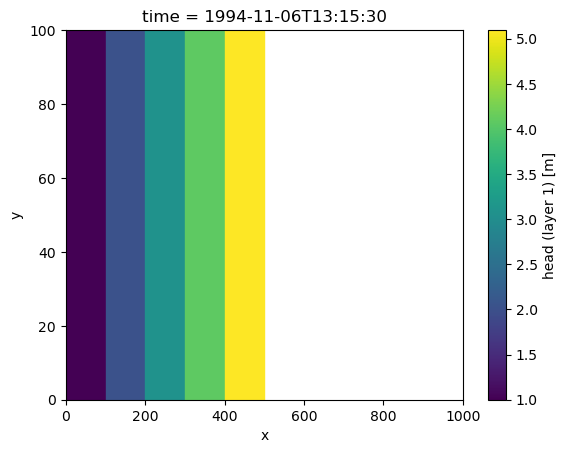

In [6]:
ax = plt.gca()
arr = xul["head_l1"].isel(time=0).ugrid.plot(ax=ax)
ax.set_xlim(0, 1000)
ax.set_ylim(0,100)

(0.0, 100.0)

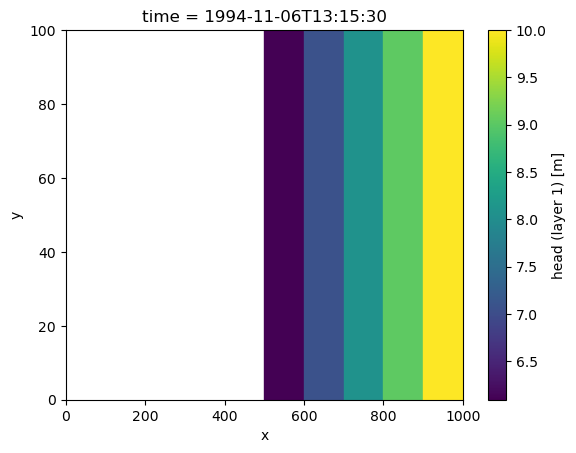

In [7]:
ax = plt.gca()
xur["head_l1"].isel(time=0).ugrid.plot(ax=ax)
ax.set_xlim(0, 1000)
ax.set_ylim(0,100)

In [8]:
xumff = xu.merge_partitions([xul, xur])
xumff

<xarray.Dataset> Size: 1kB
Dimensions:          (nmesh_node: 22, time: 1, nmesh_face: 10,
                      max_nmesh_face_nodes: 4)
Coordinates:
  * time             (time) datetime64[ns] 8B 1994-11-06T13:15:30
  * nmesh_face       (nmesh_face) int64 80B 0 1 2 3 4 5 6 7 8 9
  * nmesh_node       (nmesh_node) int64 176B 0 1 2 3 4 5 6 ... 16 17 18 19 20 21
Dimensions without coordinates: max_nmesh_face_nodes
Data variables:
    mesh_node_x      (nmesh_node) float64 176B 0.0 100.0 200.0 ... 900.0 1e+03
    mesh_node_y      (nmesh_node) float64 176B 100.0 100.0 100.0 ... 0.0 0.0 0.0
    head_l1          (time, nmesh_face) float64 80B 1.0 2.039 ... 9.037 10.0
    mesh_face_x      (nmesh_face) float64 80B 0.0 50.0 150.0 ... 750.0 850.0
    mesh_face_y      (nmesh_face) float64 80B 50.0 50.0 50.0 ... 50.0 50.0 50.0
    mesh_face_ybnds  (nmesh_face, max_nmesh_face_nodes) float64 320B 0.0 ... ...
    mesh_face_xbnds  (nmesh_face, max_nmesh_face_nodes) float64 320B 0.0 ... ...

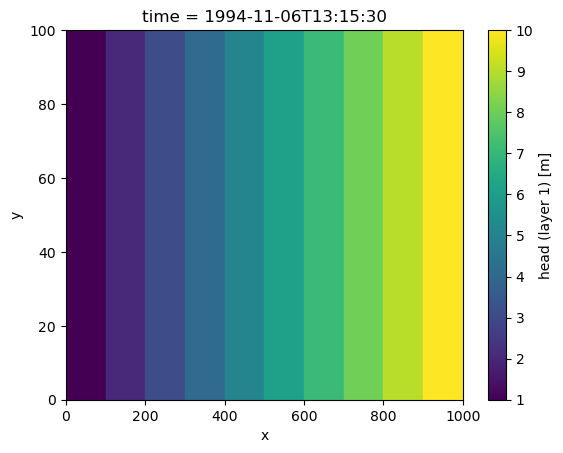

In [9]:
xumff["head_l1"].isel(time=0).ugrid.plot()